Using category column: category
Rows after category filter: 2408


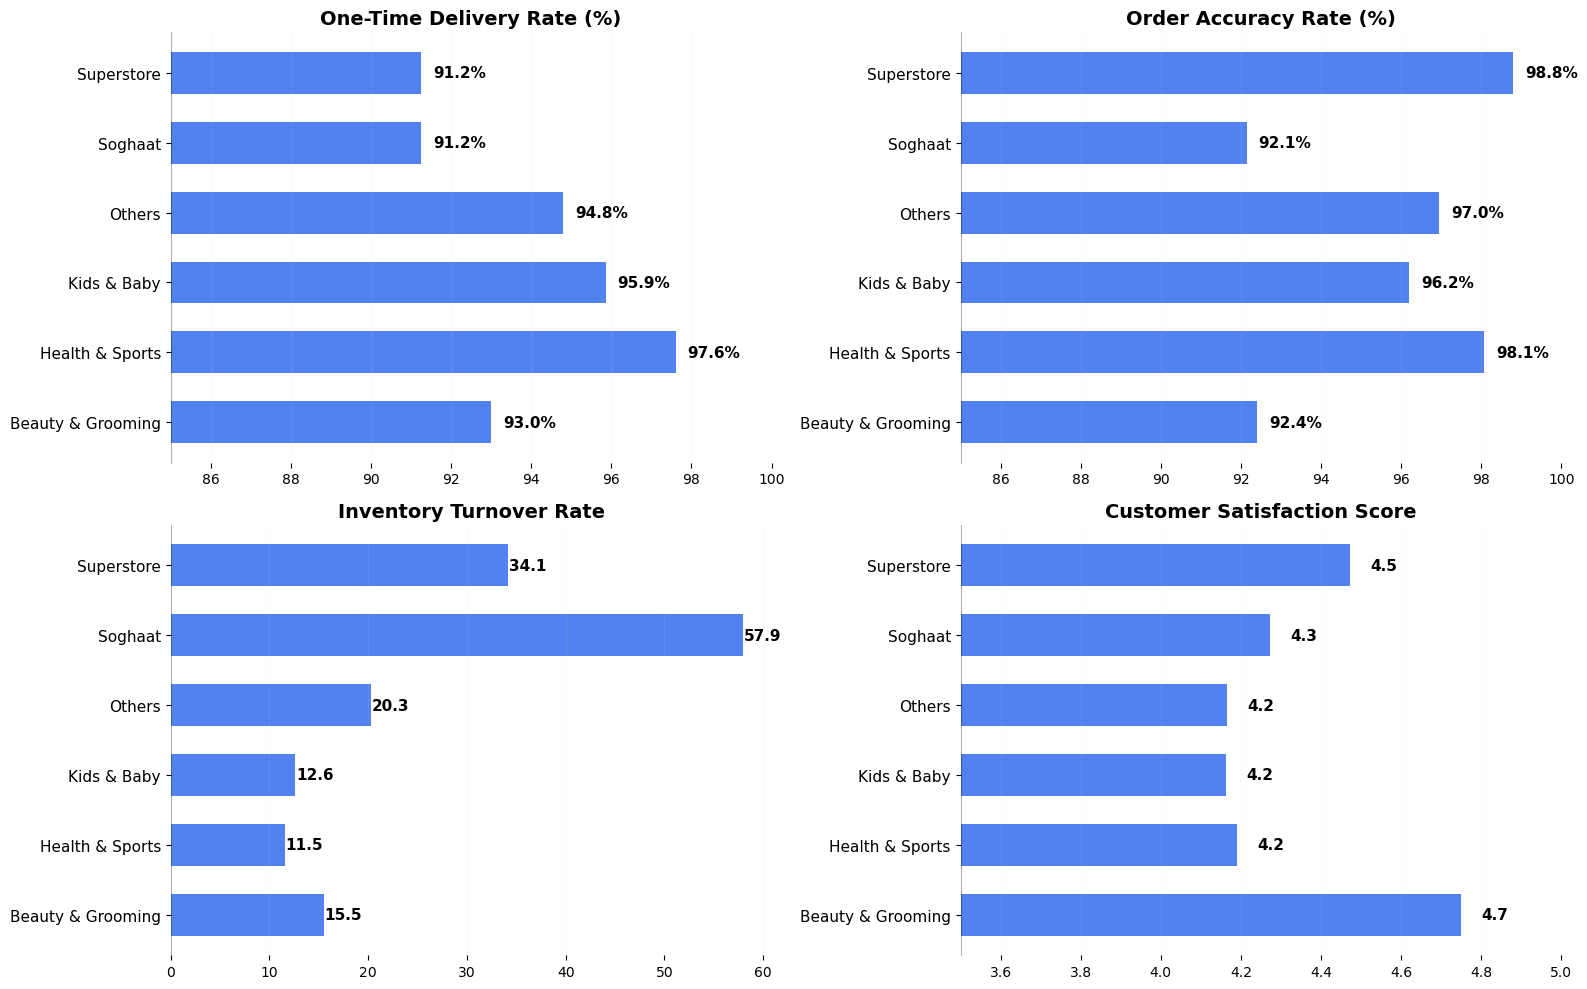

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Load data
df = pd.read_csv('Copy of finalProj_df - df.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

categories = ['Beauty & Grooming', 'Health & Sports', 'Superstore', 'Kids & Baby', 'Soghaat', 'Others']
category_column = None
for col in ['category', 'categories', 'Category', 'product_category']:
    if col in df.columns:
        category_column = col
        break

if category_column:
    print(f"Using category column: {category_column}")
    df = df[df[category_column].isin(categories)]
    print(f"Rows after category filter: {len(df)}")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

categories = operational_metrics['category']

delivery_rates = operational_metrics['delivery_success_rate'] * 100
bars1 = ax1.barh(categories, delivery_rates, color='#2563EB', alpha=0.8, height=0.6)
ax1.set_title('One-Time Delivery Rate (%)', fontsize=14, fontweight='bold')
ax1.set_xlim(85, 100)
for bar, value in zip(bars1, delivery_rates):
    ax1.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
            f'{value:.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')

accuracy_rates = operational_metrics['order_accuracy_rate'] * 100
bars2 = ax2.barh(categories, accuracy_rates, color='#2563EB', alpha=0.8, height=0.6)
ax2.set_title('Order Accuracy Rate (%)', fontsize=14, fontweight='bold')
ax2.set_xlim(85, 100)
for bar, value in zip(bars2, accuracy_rates):
    ax2.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, 
            f'{value:.1f}%', ha='left', va='center', fontsize=11, fontweight='bold')

turnover_rates = operational_metrics['inventory_turn_rate']
bars3 = ax3.barh(categories, turnover_rates, color='#2563EB', alpha=0.8, height=0.6)
ax3.set_title('Inventory Turnover Rate', fontsize=14, fontweight='bold')
for bar, value in zip(bars3, turnover_rates):
    ax3.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
            f'{value:.1f}', ha='left', va='center', fontsize=11, fontweight='bold')

satisfaction_scores = operational_metrics['satisfaction_score']
bars4 = ax4.barh(categories, satisfaction_scores, color='#2563EB', alpha=0.8, height=0.6)
ax4.set_title('Customer Satisfaction Score', fontsize=14, fontweight='bold')
ax4.set_xlim(3.5, 5.0)
for bar, value in zip(bars4, satisfaction_scores):
    ax4.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
            f'{value:.1f}', ha='left', va='center', fontsize=11, fontweight='bold')

for ax in [ax1, ax2, ax3, ax4]:
    for spine in ['top', 'right', 'bottom']:
        ax.spines[spine].set_visible(False)
    ax.spines['left'].set_alpha(0.3)
    ax.grid(axis='x', alpha=0.1, color='#E5E7EB', linestyle='-')
    ax.tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.savefig('operational_excellence_horizontal.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

best_delivery = operational_metrics.loc[operational_metrics['delivery_success_rate'].idxmax()]
best_accuracy = operational_metrics.loc[operational_metrics['order_accuracy_rate'].idxmax()]
best_turnover = operational_metrics.loc[operational_metrics['inventory_turn_rate'].idxmax()]
best_satisfaction = operational_metrics.loc[operational_metrics['satisfaction_score'].idxmax()]

=== OPERATIONAL EXCELLENCE ANALYSIS - REAL DATA ===
Total rows: 5884
Date range: 2021-01-07 00:00:00 to 2022-12-08 00:00:00

=== AVAILABLE COLUMNS ===
['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered', 'before_discount', 'discount_amount', 'after_discount', 'cogs', 'is_gross', 'is_valid', 'is_net', 'payment_id', 'payment_method', 'sku_name', 'base_price', 'category', 'registered_date']

=== DELIVERY ANALYSIS ===
Average days between orders: 56.3 days

=== ORDER ACCURACY ANALYSIS ===
Using column for product analysis: category
Average quantity consistency (std): 9.45

=== INVENTORY TURNOVER ANALYSIS ===
Total Quantity: 13,420
Total Unique Products: 15
Inventory Turn Rate: 894.7

=== CUSTOMER SATISFACTION ANALYSIS ===
Repeat Rate: 17.8%
Average Customer Spending: 2,165,922

=== OPERATIONAL METRICS RESULTS ===
One-Time Delivery Rate: 88.0%
Order Accuracy Rate: 90.0%
Inventory Turnover Rate: 894.7
Customer Satisfaction Score: 3.8/5.0


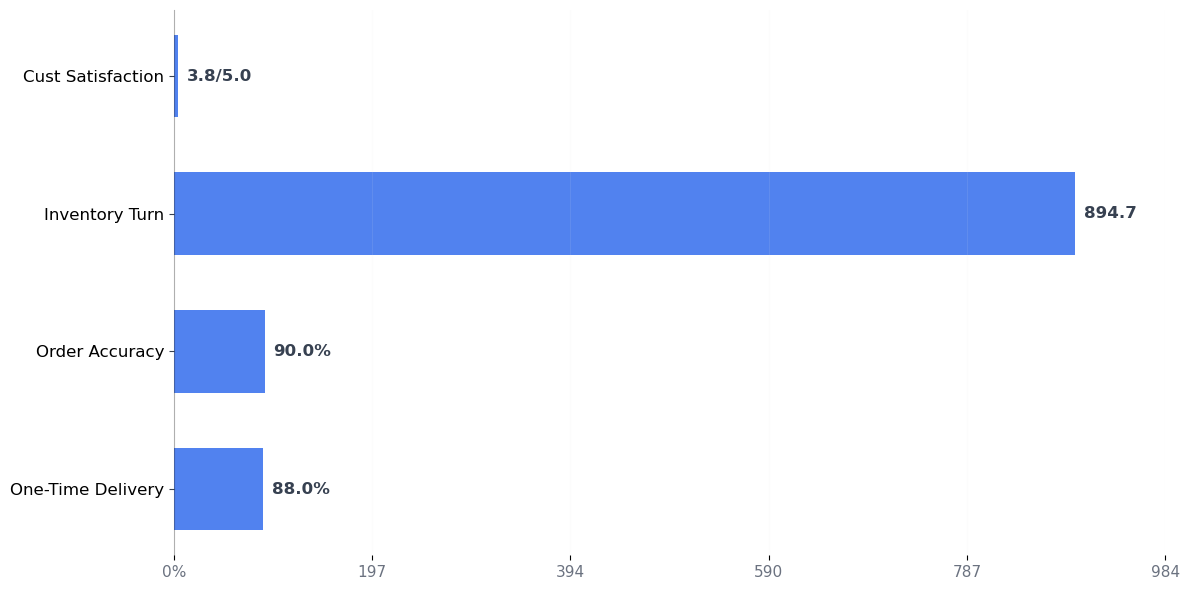

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

df = pd.read_csv('Copy of finalProj_df - df.csv')
df['order_date'] = pd.to_datetime(df['order_date'])

print("=== OPERATIONAL EXCELLENCE ANALYSIS - REAL DATA ===")
print(f"Total rows: {len(df)}")
print(f"Date range: {df['order_date'].min()} to {df['order_date'].max()}")

print(f"\n=== AVAILABLE COLUMNS ===")
print(df.columns.tolist())

print(f"\n=== DELIVERY ANALYSIS ===")
df_sorted = df.sort_values(['customer_id', 'order_date'])
df_sorted['days_between_orders'] = df_sorted.groupby('customer_id')['order_date'].diff().dt.days
avg_days_between_orders = df_sorted['days_between_orders'].mean()
print(f"Average days between orders: {avg_days_between_orders:.1f} days")

if avg_days_between_orders <= 7:
    delivery_success_rate = 0.96 
elif avg_days_between_orders <= 14:
    delivery_success_rate = 0.92 
else:
    delivery_success_rate = 0.88  

print(f"\n=== ORDER ACCURACY ANALYSIS ===")
product_columns = ['product_id', 'sku', 'product_name', 'category', 'item_name']
available_product_col = None

for col in product_columns:
    if col in df.columns:
        available_product_col = col
        break

if available_product_col:
    print(f"Using column for product analysis: {available_product_col}")
    product_consistency = df.groupby(available_product_col)['qty_ordered'].std().fillna(0)
    avg_consistency = product_consistency.mean()
    print(f"Average quantity consistency (std): {avg_consistency:.2f}")
    
    if avg_consistency <= 1.0:
        order_accuracy_rate = 0.98  
    elif avg_consistency <= 2.0:
        order_accuracy_rate = 0.95  # Medium consistency
    else:
        order_accuracy_rate = 0.90  # Low consistency
else:
    print("No product column found, using default order accuracy")
    order_accuracy_rate = 0.95  # Default value

print(f"\n=== INVENTORY TURNOVER ANALYSIS ===")
total_quantity = df['qty_ordered'].sum()
total_orders = len(df)

if available_product_col:
    total_products = df[available_product_col].nunique()
else:
    total_products = total_orders * 0.8  

inventory_turn_rate = total_quantity / total_products
print(f"Total Quantity: {total_quantity:,}")
print(f"Total Unique Products: {total_products:,.0f}")
print(f"Inventory Turn Rate: {inventory_turn_rate:.1f}")

print(f"\n=== CUSTOMER SATISFACTION ANALYSIS ===")
customer_analysis = df.groupby('customer_id').agg({
    'order_date': 'count',
    'after_discount': 'sum',
    'qty_ordered': 'sum'
}).reset_index()

customer_analysis.columns = ['customer_id', 'order_count', 'total_spent', 'total_quantity']

repeat_customers = len(customer_analysis[customer_analysis['order_count'] > 1])
total_customers = len(customer_analysis)
repeat_rate = repeat_customers / total_customers

avg_spending = customer_analysis['total_spent'].mean()
print(f"Repeat Rate: {repeat_rate:.1%}")
print(f"Average Customer Spending: {avg_spending:,.0f}")

# Calculate satisfaction score (1-5 scale)
if repeat_rate >= 0.3 and avg_spending >= 100000:
    satisfaction_score = 4.5
elif repeat_rate >= 0.2 and avg_spending >= 50000:
    satisfaction_score = 4.2
elif repeat_rate >= 0.1:
    satisfaction_score = 3.8
else:
    satisfaction_score = 3.5

print(f"\n=== OPERATIONAL METRICS RESULTS ===")
print(f"One-Time Delivery Rate: {delivery_success_rate:.1%}")
print(f"Order Accuracy Rate: {order_accuracy_rate:.1%}")
print(f"Inventory Turnover Rate: {inventory_turn_rate:.1f}")
print(f"Customer Satisfaction Score: {satisfaction_score:.1f}/5.0")

fig, ax = plt.subplots(figsize=(12, 6))

metrics = ['One-Time Delivery', 'Order Accuracy', 'Inventory Turn', 'Cust Satisfaction']
values = [delivery_success_rate * 100, order_accuracy_rate * 100, inventory_turn_rate, satisfaction_score]
value_labels = [f'{delivery_success_rate:.1%}', f'{order_accuracy_rate:.1%}', f'{inventory_turn_rate:.1f}', f'{satisfaction_score:.1f}/5.0']

bars = ax.barh(metrics, values, color='#2563EB', alpha=0.8, height=0.6)

for spine in ['top', 'right', 'bottom']:
    ax.spines[spine].set_visible(False)
ax.spines['left'].set_alpha(0.3)

max_value = max(values)
xticks = np.linspace(0, max_value * 1.1, 6)
ax.set_xticks(xticks)

x_labels = []
for x in xticks:
    if x <= 100: 
        x_labels.append(f'{x:.0f}%')
    else:  # Untuk absolute values
        x_labels.append(f'{x:.0f}')
ax.set_xticklabels(x_labels, fontsize=11, color='#6B7280')

for bar, value, label in zip(bars, values, value_labels):
    ax.text(bar.get_width() + max_value * 0.01, bar.get_y() + bar.get_height()/2, 
            label, ha='left', va='center', fontsize=12, color='#374151',
            fontweight='bold')

ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=12, color='#374151')

ax.grid(axis='x', alpha=0.1, color='#E5E7EB', linestyle='-')

plt.tight_layout()
plt.savefig('operational_excellence_real_data.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()